In [2]:
import  pandas as pd
from jupyter_server_terminals import TerminalsExtensionApp
from requests.packages import target
from terminado import TermManagerBase

In [3]:
teams = pd.read_csv('./data/teams.csv')

In [4]:
teams = teams[["team","country","year","age","medals","prev_medals"]]

In [5]:
import seaborn as sns

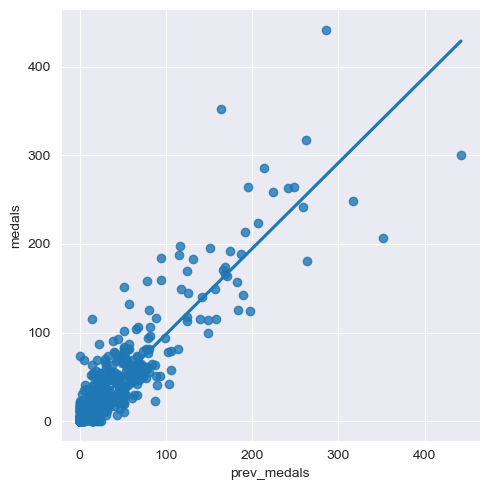

In [6]:
sns.lmplot(x="prev_medals",y="medals",data=teams,fit_reg=True,ci=None)

In [7]:
teams[teams.isnull().any(axis=1)]


,team,country,year,age,medals,prev_medals
19,ALB,Albania,1992,25.3,0,NaN
26,ALG,Algeria,1964,26.0,0,NaN
39,AND,Andorra,1976,28.3,0,NaN
50,ANG,Angola,1980,17.4,0,NaN
59,ANT,Antigua and Barbuda,1976,23.2,0,NaN
...,...,...,...,...,...,...
2092,VIN,Saint Vincent and the Grenadines,1988,20.5,0,NaN
2103,YAR,North Yemen,1984,27.7,0,NaN
2105,YEM,Yemen,1992,19.6,0,NaN
2112,YMD,South Yemen,1988,23.6,0,NaN


In [8]:
teams.dropna(subset=["prev_medals"])

,team,country,year,age,medals,prev_medals
0,AFG,Afghanistan,1964,22.0,0,0.0
1,AFG,Afghanistan,1968,23.2,0,0.0
2,AFG,Afghanistan,1972,29.0,0,0.0
3,AFG,Afghanistan,1980,23.6,0,0.0
4,AFG,Afghanistan,2004,18.6,0,0.0
...,...,...,...,...,...,...
2139,ZIM,Zimbabwe,2000,25.0,0,0.0
2140,ZIM,Zimbabwe,2004,25.1,3,0.0
2141,ZIM,Zimbabwe,2008,26.1,4,3.0
2142,ZIM,Zimbabwe,2012,27.3,0,4.0


In [9]:
teams = teams.dropna()

In [10]:
train = teams[teams["year"]<2008].copy()
test = teams[teams["year"]>2008].copy()

In [11]:
train.shape


(1410, 6)

In [12]:
test.shape

(405, 6)

In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
reg=LinearRegression()

In [15]:
predictors = ["prev_medals"]
target = "medals"

In [16]:
reg.fit(train[predictors],train["medals"])

LinearRegression()

In [17]:
predictors = reg.predict(test[predictors])

In [18]:
predictors

array([  2.17448723,   2.17448723,   1.18942702,   1.18942702,
         3.15954743,   2.17448723,   1.18942702,   1.18942702,
         1.18942702,   1.18942702,   1.18942702,   1.18942702,
        51.42749745,  19.90557091,   7.09978825,   4.14460764,
         1.18942702,   1.18942702,   1.18942702,   1.18942702,
       147.9633975 , 113.48629034,   4.14460764,   1.18942702,
         8.08484845,  11.04002907,   8.08484845,   5.12966784,
         1.18942702,   1.18942702,   1.18942702,   1.18942702,
         1.18942702,   1.18942702,   6.11472804,   4.14460764,
         1.18942702,   1.18942702,   1.18942702,   1.18942702,
         1.18942702,   1.18942702,   1.18942702,   1.18942702,
         1.18942702,   1.18942702,  29.75617295,  23.84581173,
         1.18942702,   1.18942702,   1.18942702,   2.17448723,
        78.02412297,  59.30797909,   1.18942702,   2.17448723,
         1.18942702,   1.18942702,   6.11472804,   3.15954743,
         1.18942702,   1.18942702,   1.18942702,   1.18

In [19]:
test["predictions"] = predictors

In [20]:
test.loc[test["medals"].isnull().any(axis=1)]]

ValueError: No axis named 1 for object type Series